## **Lab 2 - Clustering Exercise**

In this exercise, we will apply our knowledge of clustering on the following dataset:

Dataset Link:
https://www.kaggle.com/datasets/arjunbhasin2013/ccdata

Clustering on this dataset will be done using KMeans, Hierarchal clustering and DBSCAN. Finding the optimal hypermaters for each and then choosing the best model among the three

Start by Importing needed libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Reading the dataset into a DataFrame

In [2]:
df = pd.read_csv(r"E:\GUC\sem 10\(NETW 1013) Machine Learning\labs\lab 2\CC GENERAL.csv")

In [3]:
df = df.set_index('CUST_ID')

In [4]:
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
CUST_ID,,,,,,,,,,,,,,,,,
C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [5]:
df = df.fillna(0)

In [7]:
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
CUST_ID,,,,,,,,,,,,,,,,,
C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,0.000000,0.000000,12
C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [8]:
df = pd.get_dummies(df)

In [9]:
print (len(df))

8950


In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)

In [11]:
print(scaled_df[:5])  # Show first 5 rows

[[-0.73198937 -0.24943448 -0.42489974 -0.35693402 -0.34907882 -0.46678555
  -0.80649035 -0.67866081 -0.70731317 -0.67534886 -0.47606982 -0.51133325
  -0.96021348 -0.52897879 -0.2973097  -0.52555097  0.36067954]
 [ 0.78696085  0.13432467 -0.46955188 -0.35693402 -0.45457623  2.60560451
  -1.22175806 -0.67866081 -0.91699519  0.57396272  0.11007385 -0.59179588
   0.68871835  0.81864213  0.10204243  0.2342269   0.36067954]
 [ 0.44713513  0.51808382 -0.10766823  0.10888851 -0.45457623 -0.46678555
   1.26984323  2.67345108 -0.91699519 -0.67534886 -0.47606982 -0.10902012
   0.82612934 -0.38380474 -0.08848934 -0.52555097  0.36067954]
 [ 0.04909914 -1.01695278  0.23205785  0.54618946 -0.45457623 -0.36865325
  -1.01412545 -0.39931927 -0.91699519 -0.25891333 -0.3295339  -0.55156456
   0.82612934 -0.59868826 -0.35703495 -0.52555097  0.36067954]
 [-0.3587753   0.51808382 -0.46206305 -0.34729428 -0.45457623 -0.46678555
  -1.01412545 -0.39931927 -0.91699519 -0.67534886 -0.47606982 -0.55156456
  -0.905

## K-Means

Find the optimal Kmeans model

In [12]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [13]:
ssd = []
silhouette_scores = []

# Define k values
k_values = list(range(2, 11))

# Loop through different values of k
for k in k_values:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(scaled_df)
    
    # Store SSD (Elbow Method)
    ssd.append(model.inertia_)
    
    # Compute silhouette score
    labels = model.labels_
    score = silhouette_score(scaled_df, labels)
    silhouette_scores.append(score)


Text(0, 0.5, ' Sum of Squared Distances')

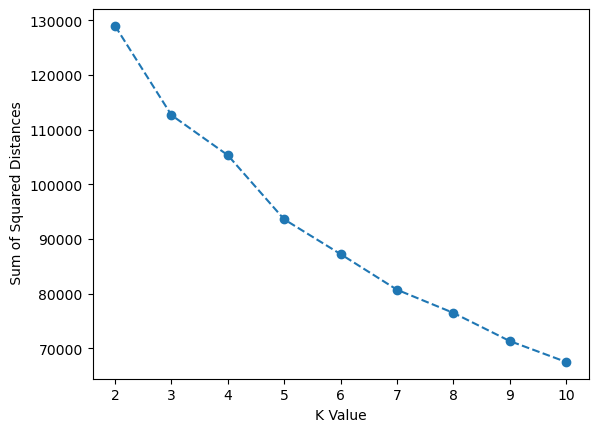

In [14]:
plt.plot(range(2,11),ssd,'o--')
plt.xlabel("K Value")
plt.ylabel(" Sum of Squared Distances")

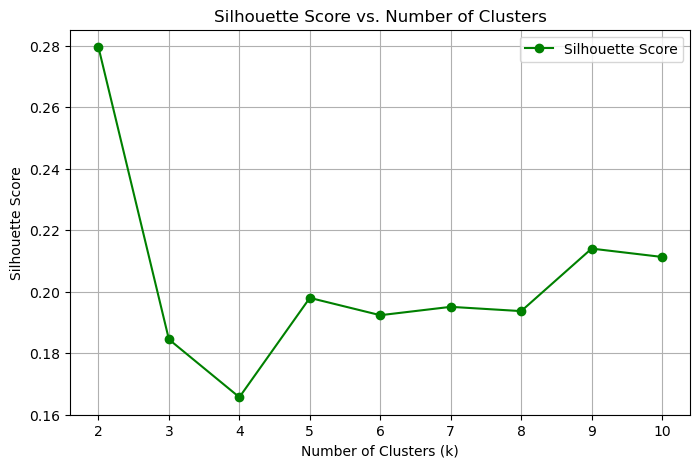

In [15]:
plt.figure(figsize=(8, 5))
plt.plot(k_values, silhouette_scores, marker='o', linestyle='-', color='g', label="Silhouette Score")
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')
plt.xticks(k_values)
plt.grid(True)
plt.legend()
plt.show()

Choose the optimal K and calculate the silhouette score for the best model.

In [16]:
best_model = KMeans(n_clusters=8, random_state=42)
best_model.fit(scaled_df)

# Get cluster labels
best_labels = best_model.labels_

# Compute the silhouette score for the best model
best_silhouette_score = silhouette_score(scaled_df, best_labels)

print(f"Silhouette Score for K={8}: {best_silhouette_score:.4f}")

Silhouette Score for K=8: 0.1937


## Agglomerative Clustering

Find the optimal agglomerative clustering model.

In [17]:
from sklearn.cluster import AgglomerativeClustering

n_clusters = 2, Silhouette Score = 0.8497
n_clusters = 3, Silhouette Score = 0.8391
n_clusters = 4, Silhouette Score = 0.8103
n_clusters = 5, Silhouette Score = 0.7498
n_clusters = 6, Silhouette Score = 0.7358


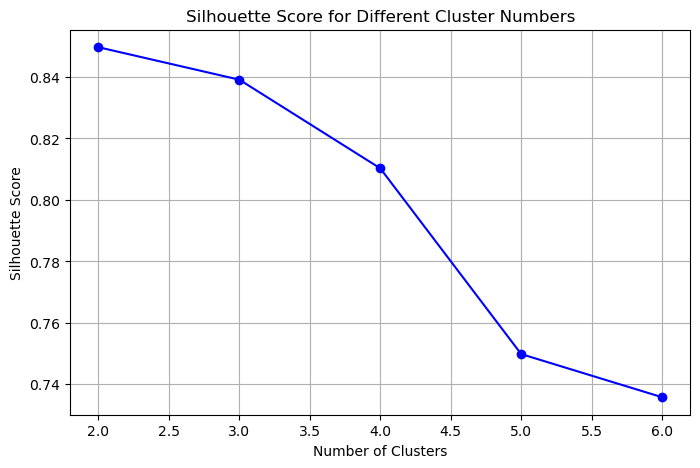

In [18]:
n_clusters_range = range(2, 7)

# Lists to store silhouette scores
silhouette_scores = []

# Loop over different values of n_clusters
for n_clusters in n_clusters_range:
    model = AgglomerativeClustering(n_clusters=n_clusters, metric="euclidean", linkage="average")
    model.fit(scaled_df)  # Fit model to data
    
    labels = model.labels_  # Get cluster labels
    score = silhouette_score(scaled_df, labels)  # Calculate silhouette score
    
    silhouette_scores.append(score)  # Store the score

    print(f"n_clusters = {n_clusters}, Silhouette Score = {score:.4f}")

# Plot Silhouette Scores vs. Number of Clusters
plt.figure(figsize=(8, 5))
plt.plot(n_clusters_range, silhouette_scores, marker="o", linestyle="-", color="b")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score for Different Cluster Numbers")
plt.grid()
plt.show()

n_clusters = 2, Silhouette Score = 0.1883
n_clusters = 3, Silhouette Score = 0.1759
n_clusters = 4, Silhouette Score = 0.1775
n_clusters = 5, Silhouette Score = 0.1385
n_clusters = 6, Silhouette Score = 0.1262


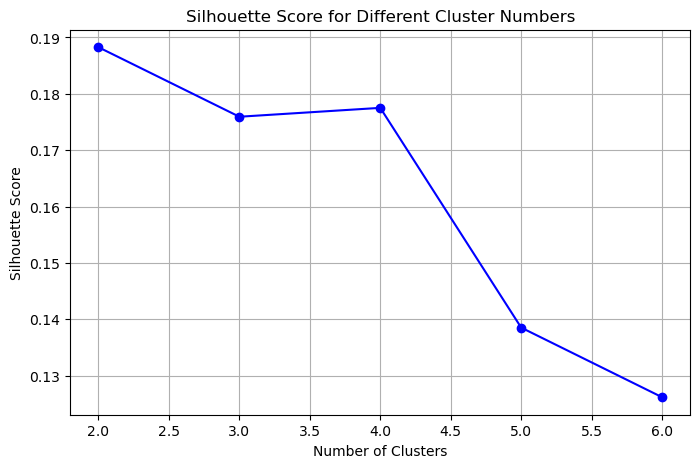

In [19]:
n_clusters_range = range(2, 7)

# Lists to store silhouette scores
silhouette_scores = []

# Loop over different values of n_clusters
for n_clusters in n_clusters_range:
    model = AgglomerativeClustering(n_clusters=n_clusters,metric="euclidean", linkage="ward")
    model.fit(scaled_df)  # Fit model to data
    
    labels = model.labels_  # Get cluster labels
    score = silhouette_score(scaled_df, labels)  # Calculate silhouette score
    
    silhouette_scores.append(score)  # Store the score

    print(f"n_clusters = {n_clusters}, Silhouette Score = {score:.4f}")

# Plot Silhouette Scores vs. Number of Clusters
plt.figure(figsize=(8, 5))
plt.plot(n_clusters_range, silhouette_scores, marker="o", linestyle="-", color="b")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score for Different Cluster Numbers")
plt.grid()
plt.show()

Choose the optimal K and calculate the silhouette score for the best model.

In [21]:
best_model = AgglomerativeClustering(n_clusters=4, metric="euclidean", linkage="average")
best_model.fit(scaled_df)

# Get cluster labels
best_labels = best_model.labels_

# Compute the silhouette score for the best model
best_silhouette_score = silhouette_score(scaled_df, best_labels)

print(f"Silhouette Score for K={5}: {best_silhouette_score:.4f}")

Silhouette Score for K=5: 0.8103


## DBSCAN

Find the optimal DBSCAN model.

In [22]:
from sklearn.cluster import DBSCAN 

In [41]:
eps_values = np.linspace(1, 5, 50)
outlier_percentages = []

for eps in eps_values:
    dbscan = DBSCAN(eps=eps)
    
    # Fit DBSCAN to the data and get cluster labels (-1 means outlier)
    cluster_labels = dbscan.fit_predict(scaled_df)
    
    # Calculate the percentage of outliers (points with label -1)
    perc_outliers = 100 * np.sum(cluster_labels == -1) / len(cluster_labels)
    outlier_percentages.append(perc_outliers)

    



Text(0.5, 0, 'Epsilon Value')

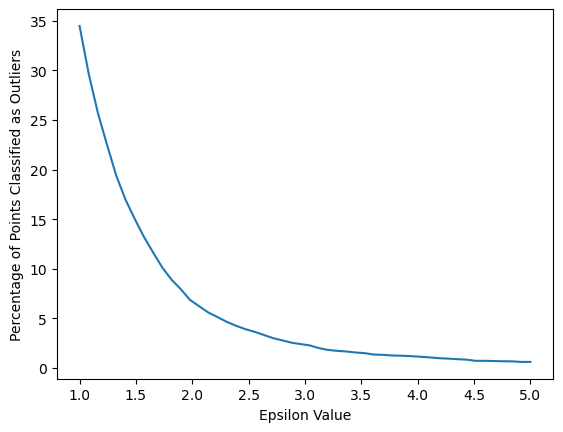

In [42]:
sns.lineplot(x=eps_values,y=outlier_percentages)
plt.ylabel("Percentage of Points Classified as Outliers")
plt.xlabel("Epsilon Value")

In [ ]:
plt.figure(figsize=(8, 5))
sns.lineplot(x=eps_values, y=silhouette_scores, marker='o')
plt.xlabel("Epsilon Value")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score vs Epsilon for DBSCAN")
plt.grid(True)
plt.show()

min_samples = 2, Outlier Percentage = 4.20%
min_samples = 3, Outlier Percentage = 4.65%
min_samples = 4, Outlier Percentage = 5.03%
min_samples = 5, Outlier Percentage = 5.26%
min_samples = 6, Outlier Percentage = 5.40%
min_samples = 7, Outlier Percentage = 5.73%
min_samples = 8, Outlier Percentage = 5.84%
min_samples = 9, Outlier Percentage = 5.99%


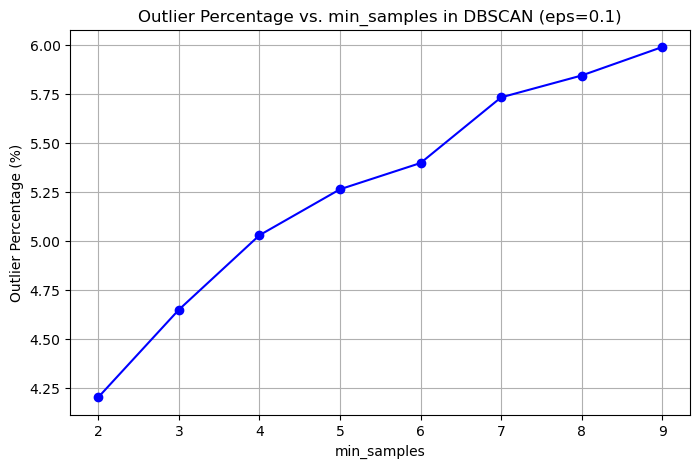

In [45]:
min_samples_values = np.arange(2, 10)

# List to store the percentage of outliers for each min_samples value
outlier_percentages = []

# Fix eps to 0.1
fixed_eps = 2.2

for min_samples in min_samples_values:
    # Create DBSCAN with fixed eps and varying min_samples
    dbscan = DBSCAN(eps=fixed_eps, min_samples=min_samples)
    
    # Fit DBSCAN to the data and get cluster labels (-1 means outlier)
    cluster_labels = dbscan.fit_predict(scaled_df)
    
    # Calculate the percentage of outliers (points with label -1)
    perc_outliers = 100 * np.sum(cluster_labels == -1) / len(cluster_labels)
    outlier_percentages.append(perc_outliers)
    
    print(f"min_samples = {min_samples}, Outlier Percentage = {perc_outliers:.2f}%")

# Plot outlier percentage vs. min_samples
plt.figure(figsize=(8, 5))
plt.plot(min_samples_values, outlier_percentages, marker='o', linestyle='-', color='b')
plt.xlabel('min_samples')
plt.ylabel('Outlier Percentage (%)')
plt.title('Outlier Percentage vs. min_samples in DBSCAN (eps=0.1)')
plt.grid(True)
plt.show()


Find the parameters that optimize the performance of your model and calculate the silhouette score.

In [48]:
dbscan = DBSCAN(eps=2.2, min_samples=4)
cluster_labels = dbscan.fit_predict(scaled_df)
perc_outliers = 100 * np.sum(cluster_labels == -1) / len(cluster_labels)
print(f" Outlier Percentage = {perc_outliers:.2f}%")


 Outlier Percentage = 5.03%


In [49]:
valid_points = scaled_df[cluster_labels != -1]  # Keep only clustered points
valid_labels = cluster_labels[cluster_labels != -1]  # Keep only valid cluster labels

# Compute silhouette score only if at least 2 clusters exist
if len(set(valid_labels)) > 1:
    sil_score = silhouette_score(valid_points, valid_labels)
    print(f"Silhouette Score: {sil_score:.2f}")
else:
    print("Silhouette score not applicable (only one cluster found).")

Silhouette Score: 0.38


## Result Interpretation and Discussion

Which model was chosen? Why was it chosen and based on what?

Agglomerative Clustering has the best Silhouette Score